In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.utils import np_utils
from scipy.stats import multivariate_normal as mvn

#Import .py file of general algorithms
from google.colab import files
files.upload()
from general import KNNClassifier as knn
from general import accuracy
from general import confusionMatrix
from general import GaussBayes as gb
from general import GaussNB as ngb

Saving general.py to general.py


# Work with the data

Import the data, and create the train and test sets.
Normalize and visualize your data

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/Enhance It/Training Projects/MNIST Bayes and KNN/Germán Eduardo Baltazar Reyes - MNIST_train.csv')
train_data

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data = pd.read_csv('/content/drive/MyDrive/Enhance It/Training Projects/MNIST Bayes and KNN/Germán Eduardo Baltazar Reyes - MNIST_test.csv')
test_data

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = train_data.to_numpy()
X_test = test_data.to_numpy()
x_train = X_train[:,3:].astype('float32')
x_test = X_test[:,3:].astype('float32')
y_train = X_train[:,2]
y_test = X_test[:,2]

print(f"Train set: {x_train.shape},{y_train.shape}")
print(f"Train set: {x_test.shape},{y_test.shape}")

Train set: (60000, 784),(60000,)
Train set: (10000, 784),(10000,)


In [6]:
#Normalize the data
x_train /= 255
x_test /= 255

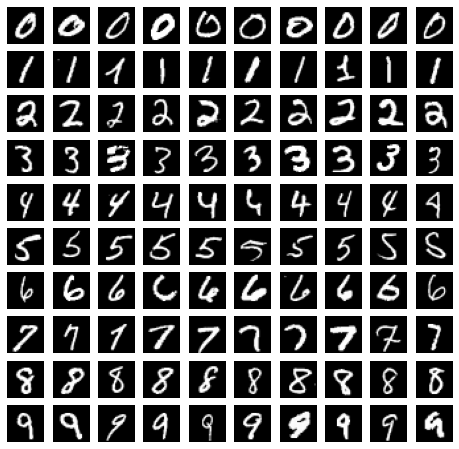

In [7]:
#Visualize 10 random training data from every single number
x_vis = X_train[:,3:].reshape(len(x_train),28,28)

plt.figure(figsize=(8,8))
for i in range(10):
  index = np.where(y_train == i)
  index = index[0][np.random.randint(index[0].shape[0], size=10)]
  for j in range(10):
    plt.subplot(10,10,i*10+j+1)
    plt.imshow(x_vis[index[j]], cmap='gray')
    plt.axis('off')
plt.show()

# Use of Naive Bayes

In [8]:
mnist_naive = ngb()
epsilons = np.linspace(1e-3,1e-1)
naive_accuracies = np.zeros(len(epsilons))

In [9]:
for i in range(len(epsilons)):
  print(f'Checking epsilon {i+1} out of {len(epsilons)}...')
  mnist_naive.fit(x_train,y_train,epsilon=epsilons[i])
  y_hat_naive = mnist_naive.predict(x_train)
  naive_accuracies[i] = accuracy(y_train,y_hat_naive)
#print(train_acc_naive)

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

[0.01514286] 0.8024


Text(0.5, 1.0, 'Naive Bayes Training Accuracy')

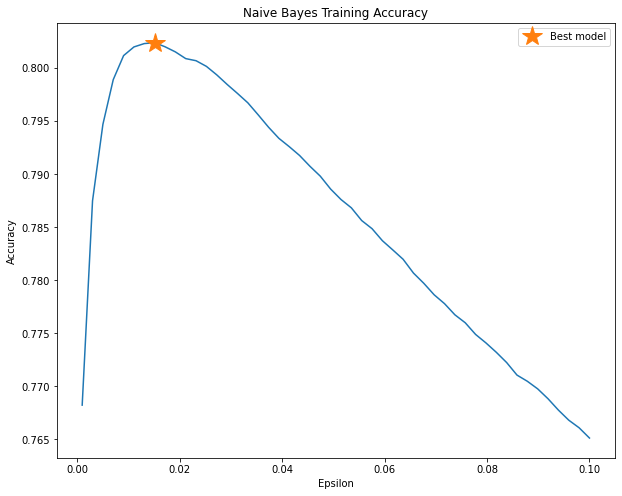

In [19]:
max_acc = max(naive_accuracies)
best_e = epsilons[np.where(naive_accuracies == max_acc)]
print(best_e, max_acc)

plt.figure(figsize=(10,8))
plt.plot(epsilons,naive_accuracies)
plt.plot(best_e,max_acc,'*',markersize=20,label='Best model')
plt.legend()
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Training Accuracy')

In [11]:
#Check the model with the test set
mnist_naive.fit(x_train,y_train,epsilon=best_e)
test_naive = mnist_naive.predict(x_test)
naive_test_acc = accuracy(y_test,test_naive)

print(f"Training accuracy: {max_acc}     Test accuracy: {naive_test_acc}")

Training accuracy: 0.8024     Test accuracy: 0.8148


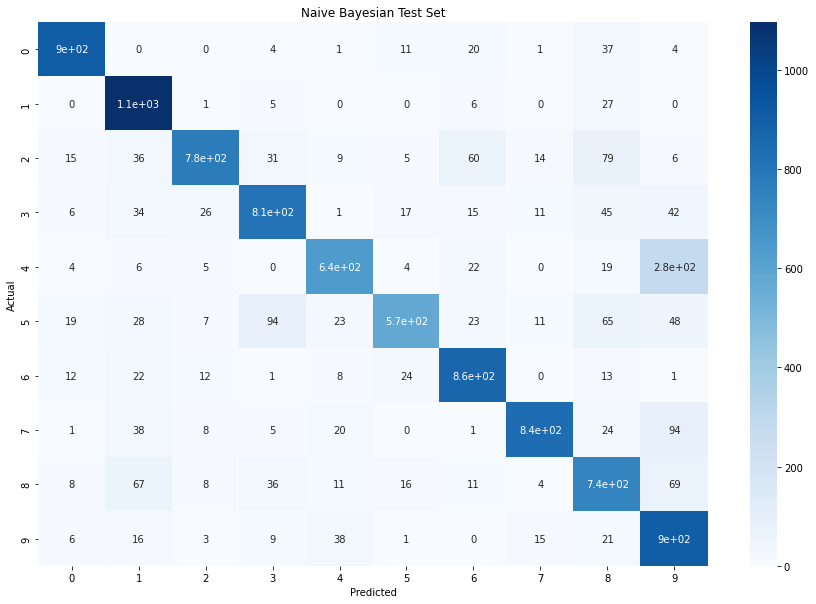

In [12]:
#Get the confusion matrix
naive_conf = confusionMatrix(y_test,test_naive)

plt.figure(figsize=(15,10))
conf_plt = sns.heatmap(naive_conf, annot=True, cmap='Blues')
conf_plt.set_title('Naive Bayesian Test Set')
conf_plt.set_xlabel('Predicted')
conf_plt.set_ylabel('Actual')
conf_plt.xaxis.set_ticklabels(['0','1', '2','3','4','5','6','7','8','9'])
conf_plt.yaxis.set_ticklabels(['0','1', '2','3','4','5','6','7','8','9'])
plt.show()

## Use of Non-naive Bayes

In [13]:
mnist_gauss = gb()
bayes_accuracies = np.zeros(len(epsilons))

In [14]:
for i in range(len(epsilons)):
  print(f'Checking epsilon {i+1} out of {len(epsilons)}...')
  mnist_gauss.fit(x_train,y_train,epsilon=epsilons[i])
  y_hat_gauss = mnist_gauss.predict(x_train)
  bayes_accuracies[i] = accuracy(y_train,y_hat_gauss)
#print(train_acc_gauss)

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

[0.03332653] 0.9597333333333333


Text(0.5, 1.0, 'Non-Naive Bayes Training Accuracy')

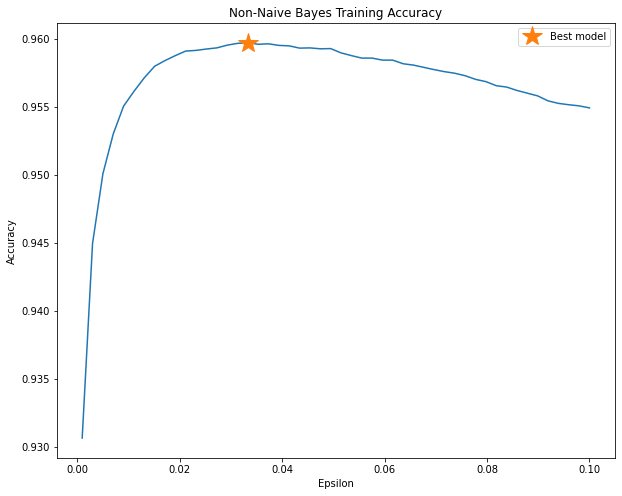

In [18]:
max_acc = max(bayes_accuracies)
best_e = epsilons[np.where(bayes_accuracies == max_acc)]
print(best_e, max_acc)

plt.figure(figsize=(10,8))
plt.plot(epsilons,bayes_accuracies)
plt.plot(best_e,max_acc,'*',markersize=20,label='Best model')
plt.legend()
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Non-Naive Bayes Training Accuracy')

In [16]:
#Check the model with the test set
mnist_gauss.fit(x_train,y_train,epsilon=best_e)
test_bayes = mnist_gauss.predict(x_test)
gauss_test_acc = accuracy(y_test,test_bayes)

print(f"Training accuracy: {max_acc}     Test accuracy: {gauss_test_acc}")

Training accuracy: 0.9597333333333333     Test accuracy: 0.9563


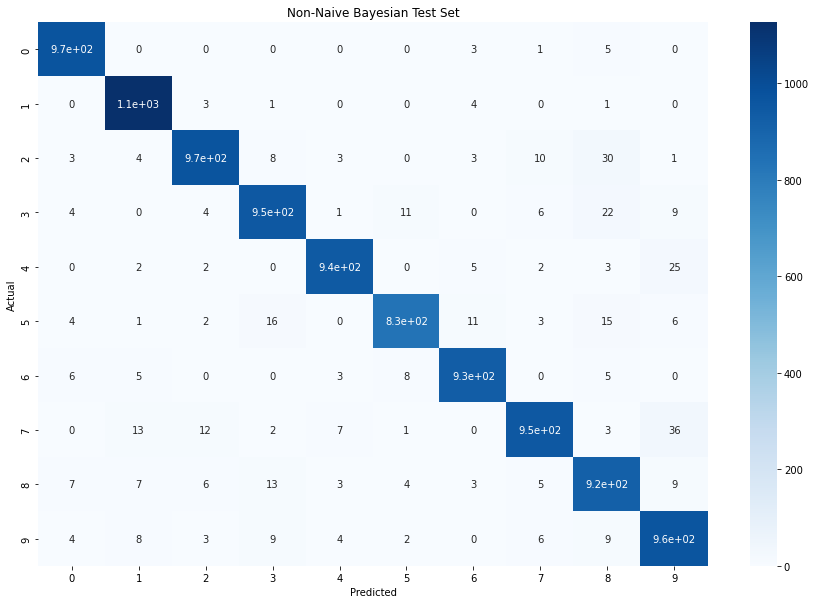

In [17]:
#Create the confusion matrix
bayes_conf = confusionMatrix(y_test,test_bayes)

plt.figure(figsize=(15,10))
conf_plt = sns.heatmap(bayes_conf, annot=True, cmap='Blues')
conf_plt.set_title('Non-Naive Bayesian Test Set')
conf_plt.set_xlabel('Predicted')
conf_plt.set_ylabel('Actual')
conf_plt.xaxis.set_ticklabels(['0','1', '2','3','4','5','6','7','8','9'])
conf_plt.yaxis.set_ticklabels(['0','1', '2','3','4','5','6','7','8','9'])
plt.show()

# Use of KNN
Cannot implement due to high dimensionality

In [26]:
#Reshape the data for x
x_train = x_train.reshape(len(x_train),28,28)
x_train.shape

(60000, 28, 28)

In [31]:
with tf.device('/device:GPU:0'):
  mnist_knn = knn()
  mnist_knn.fit(x_train,y_train)

  neighbors = [x for x in range(2,11)]
  knn_acc = np.zeros(len(neighbors))

  for i in range(len(neighbors)):
    print(f"Checking {i+1} out of {len(neighbors)+1}...")
    y_hat = mnist_knn.predict(x_train, neighbors[i])
    knn_acc[i] = accuracy(y_train,y_hat)

Checking 1 out of 10...


KeyboardInterrupt: ignored

In [ ]:
max_acc = max(knn_acc)
best_k = neighbors[np.where(knn_acc == max_acc)]

plt.figure(figsize=(10,8))
plt.plot(neighbors,knn_acc)
plt.plot(best_k,max_acc,'*',markersize=20,label='Best model')
plt.legend()
plt.xlabel('K neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Training Accuracy')

In [ ]:
#Determine the best number of neighbors for the classification
plt.figure(figsize=(10,6))
plt.plot(neighbors,accuracies)
plt.xlabel('Neighbors')
plt.ylabel('Train accuracy')